In [1]:
import gym
import gym_nav

env = gym.make('NavEnv-v0')
capture_video = 1
env = gym.wrappers.Monitor(env, './video', 
    video_callable=lambda t:t%capture_video==0, force=True)

obs = env.reset()
while True:
    obs, reward, done, info = env.step(env.action_space.sample())
    if done:
        break
env.close()

pygame 2.0.1 (SDL 2.0.14, Python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import gym
import gym_nav

env = gym.make('CartPole-v0')
capture_video = 1
env = gym.wrappers.Monitor(env, './video', 
    video_callable=lambda t:t%capture_video==0, force=True)

obs = env.reset()
for i in range(202):
    obs, reward, done, info = env.step(env.action_space.sample())
    if done:
        break
env.close()

In [3]:
env.metadata

{'render.modes': ['human', 'rgb_array'], 'video.frames_per_second': 50}

In [5]:
import torch
from a2c_ppo_acktr.envs import make_vec_envs

env_name = 'NavEnv-v0'
seed = 1
num_processes = 2
gamma = 0.99
log_dir = '/tmp/gym/'
device = torch.device('cpu')
capture_video = 1
env_kwargs = None
envs = make_vec_envs(env_name, seed, num_processes,
                     gamma, log_dir, device, False, capture_video=capture_video,
                     env_kwargs=env_kwargs)


for i in range(1000):
    actions = torch.tensor([envs.action_space.sample() for i in range(num_processes)]).to(device)
    envs.step(actions.reshape(2, 1))

In [21]:
if __name__ == '__main__':
    env_name = 'NavEnv-v0'
    seed = 1
    num_processes = 2
    gamma = 0.99
    log_dir = 'logs/'
    device = torch.device('cpu')
    capture_video = 1
    env_kwargs = None
    envs = make_vec_envs(env_name, seed, num_processes,
                         gamma, log_dir, device, False, capture_video=capture_video,
                         env_kwargs=env_kwargs)
    envs.reset()

    for i in range(1000):
        actions = torch.tensor([envs.action_space.sample() for i in range(num_processes)]).to(device)
        envs.step(actions.reshape(2, 1))

EOFError: 

## Switch to RecordVideo wrapper

In [24]:
import gym
import gym_nav
import numpy as np

env = gym.make('NavEnv-v0')
capture_video = 1
env = gym.wrappers.RecordVideo(env, './video')
obs = env.reset()
while True:
    obs, reward, done, info = env.step(env.action_space.sample())
    if done:
        break
env.close()

In [30]:


if __name__ == '__main__':
    env_name = 'NavEnv-v0'
    seed = 1
    num_processes = 2
    gamma = 0.99
    log_dir = 'logs/'
    device = torch.device('cpu')
    capture_video = 1
    env_kwargs = None
    envs = make_vec_envs(env_name, seed, num_processes,
                         gamma, log_dir, device, False, capture_video=capture_video,
                         env_kwargs=env_kwargs)
    envs.reset()

    for i in range(1000):
        actions = torch.tensor([envs.action_space.sample() for i in range(num_processes)]).to(device)
        _, _, dones, _ = envs.step(actions.reshape(2, 1))
        if(dones[0]):
            print('done')
        
envs.close()

done
done
done
done


In [1]:
import os

In [2]:
%%timeit
os.listdir('video')

76.4 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
def test_file(f):
    if os.path.exists(f):
        try:
            os.rename(f, f)
            return True
        except OSError as e:
            return False

In [6]:
f = os.listdir('video')[0]
f = os.path.join('video', f)

In [10]:
%%timeit
test_file(f)

532 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%%timeit
for f in os.listdir('video'):
    if '.mp4' in f:
        pass

77.1 µs ± 694 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
import os
import numpy as np

In [18]:
logged_videos = []
def available_videos():
    vid_dir = 'video'
    unuploaded_vids = []
    idxs = []
    for f in os.listdir(vid_dir):
        if '.mp4' in f and f not in logged_videos:
            unuploaded_vids.append(f)
    for f in unuploaded_vids:
        idxs.append(int(f.split('.mp4')[0].split('-')[-1]))
    return os.path.join(vid_dir, unuploaded_vids[np.argmin(idxs)])

In [22]:
logged_videos.append('rl-video-episode-2.mp4')

In [23]:
available_videos()

rl-video-episode-0.meta.json
rl-video-episode-0.mp4
rl-video-episode-1.meta.json
rl-video-episode-1.mp4
rl-video-episode-2.meta.json
rl-video-episode-2.mp4
rl-video-episode-3.meta.json
rl-video-episode-3.mp4
rl-video-episode-4.meta.json
rl-video-episode-4.mp4
['rl-video-episode-1.mp4', 'rl-video-episode-3.mp4', 'rl-video-episode-4.mp4']


'video\\rl-video-episode-1.mp4'

In [27]:
    def available_videos():
        vid_dir = 'video'
        unuploaded_vids = []
        idxs = []
        for f in os.listdir(vid_dir):
            if '.mp4' in f and f not in logged_videos:
                unuploaded_vids.append(f)

        if len(unuploaded_vids) > 1:
            for f in unuploaded_vids:
                idxs.append(int(f.split('.mp4')[0].split('-')[-1]))
            return os.path.join(vid_dir, unuploaded_vids[np.argmin(idxs)])
        else:
            return False

    def upload_videos():
        path = available_videos()
        if path is not False:
            # wandb.log({'video': wandb.Video(path),
            #     'format': 'gif'})
            logged_videos.append(path)
                        

    logged_videos = []

In [28]:
upload_videos()

In [25]:
logged_videos

[]

In [14]:
gym.wrappers.RecordVideo()

In [17]:
actions.reshape(2, 1)

tensor([[3],
        [2]])

In [18]:
envs.step(actions.reshape(2, 1))

(tensor([[ 0.0000,  0.9910,  0.0000, -0.9998,  0.9999,  0.0000, -0.9998,  0.9999,
           0.0000,  0.0000,  0.9896,  0.0000,  0.0000,  0.9868,  0.0000,  0.0000,
           0.9842,  0.0000,  0.0000,  0.9862,  0.0000,  0.0000,  0.9883,  0.0000,
           0.0000,  0.9939,  0.0000,  0.0000,  0.6732,  0.0000,  0.0000,  0.6345,
           0.0000,  0.0000,  0.5924,  0.0000,  0.0000,  0.5468,  0.0000,  0.0000,
           0.4932,  0.0000,  0.0000,  0.4291,  0.0000,  0.0000,  0.3479,  0.0000,
           0.0000,  0.2394,  0.0000,  0.0000,  0.0845,  0.0000,  0.0000, -0.1362,
           0.0000,  0.0000, -0.4329,  0.0000,  0.0000,  0.9074,  0.0000,  0.0000,
           0.4237,  0.0000,  0.0000,  0.4494,  0.0000,  0.0000, -0.7260,  0.0000,
           0.0000, -0.8164,  0.0000,  0.0000, -0.8764,  0.0000,  0.0000, -0.9074,
           0.0000,  0.0000, -0.9144,  0.0000,  0.0000, -0.9126,  0.0000,  0.0000,
          -0.9641,  0.0000],
         [ 0.0000, -0.9896,  0.0000,  0.9999, -0.9998,  0.0000,  0.99

# Create WaterMaze Env

In [103]:
import numpy as np
import gym
from gym import spaces
import math

MAX_MARCH = 20
EPSILON = 0.1
DEG_TO_RAD = 0.0174533
WINDOW_SIZE = (200, 300) # Width x Height in pixels

def generate_box(pos=None, size=[10, 25], inside_window=True, color=(255, 255, 255), is_goal=False,
                is_visible=True, is_obstacle=True):
    '''
    Generate a box with width and height drawn randomly uniformly from size[0] to size[1]
    if inside_window is True, we force the box to stay inside the window
    '''
    box_size = np.random.uniform([size[0], size[0]], [size[1], size[1]])
    if pos is None:
        if inside_window:
            pos = np.random.uniform([box_size[0], box_size[1]], 
                                     [WINDOW_SIZE[0] - box_size[0], WINDOW_SIZE[1] - box_size[1]])
        else:
            pos = np.random.uniform(WINDOW_SIZE)
            
    if inside_window:
        return Box(pos, box_size, color=color, is_goal=is_goal)
    else:
        return Box(pos, box_size, color=color, is_goal=is_goal)

def generate_circle(pos=None, radius=[10, 25], inside_window=True, color=(255, 255, 255), is_goal=False,
                   is_visible=True, is_obstacle=True):
    circ_rad = np.random.uniform(radius[0], radius[1])
    if pos is None:
        if inside_window:
            pos = np.random.uniform([circ_rad, circ_rad], [WINDOW_SIZE[0]-circ_rad, WINDOW_SIZE[1]-circ_rad])
        else:
            pos = np.random.uniform(WINDOW_SIZE)
    
    if inside_window:
        return Circle(pos, circ_rad, color=color, is_goal=is_goal)
    else:
        return Circle(pos, circ_rad, color=color, is_goal=is_goal)

def generate_boxes(num_boxes=5, size=[10, 25], is_goal=False, inside_window=True, color=(255, 255, 255)):
    centers = []
    sizes = []
    boxes = []
    for i in range(num_boxes):
        box = generate_box(size=size, color=color, is_goal=is_goal, inside_window=inside_window)
        centers.append(box.center)
        sizes.append(box.size)
        boxes.append(box)
        
    centers = np.array(centers)
    sizes = np.array(sizes)
    return boxes, centers, sizes

def generate_circles(num_circles=5, radius=[10, 25], is_goal=False, inside_window=True, color=(255, 255, 255)):
    centers = []
    radii = []
    circles = []
    for i in range(num_circles):
        circle = generate_circle(radius=radius, color=color, is_goal=is_goal, inside_window=inside_window)
        centers.append(circle.center)
        radii.append(circle.radius)
        circles.append(circle)
        
    centers = np.array(centers)
    radii = np.array(radii)
    return circles, centers, radii


def reset_objects():
    '''reset global object lists to be populated'''
    items = ['boxes', 'box_centers', 'box_sizes', 'circles', 'circle_centers',
            'circle_radii', 'objects']
    
    for item in items:
        globals()[item] = []
    

def add_box(box):
    '''add box to global boxes object for computation'''
    globals()['boxes'].append(box)
    
    if len(globals()['box_centers']) > 0:
        globals()['box_centers'] = np.vstack([box_centers, np.array([box.center])])
        globals()['box_sizes'] = np.vstack([box_sizes, np.array([box.size])])
    else:
        globals()['box_centers'] = np.array([box.center])
        globals()['box_sizes'] = np.array([box.size])
    globals()['objects'] = globals()['boxes'] + globals()['circles']
    
    
def add_circle(circle):
    '''add circle to global circles object for computation'''
    globals()['circles'].append(circle)
    if len(globals()['circle_centers']) > 0:
        globals()['circle_centers'] = np.vstack([circle_centers, np.array([circle.center])])
        globals()['circle_radii'] = np.vstack([circle_radii, np.array([circle.radius])])
    else:
        globals()['circle_centers'] = np.array([circle.center])
        globals()['circle_radii'] = np.array([circle.radius])

    globals()['objects'] = globals()['boxes'] + globals()['circles']
    
    
def add_walls():
    add_box(Box(np.array([0, 0]), np.array([1, WINDOW_SIZE[1]]), color=(0, 255, 0)))
    add_box(Box(np.array([0, 0]), np.array([WINDOW_SIZE[0], 1]), color=(0, 255, 0)))
    add_box(Box(np.array([0, WINDOW_SIZE[1]]), np.array([WINDOW_SIZE[0], 1]), color=(0, 255, 0)))
    add_box(Box(np.array([WINDOW_SIZE[0], 0]), np.array([1, WINDOW_SIZE[1]]), color=(0, 255, 0)))

    

def spaced_random_pos(sep=5):
    '''
    Find a spot that has a minimum separation from other objects in the scene
    '''
    while True:
        pos = np.random.uniform(WINDOW_SIZE)
        if scene_sdf(pos)[0] > sep:
            return pos



def generate_world(num_objects=5, min_goal_sep=15, color=(0, 255, 0)):
    reset_objects()
    '''generate obstacles'''
    boxes, box_centers, box_sizes = generate_boxes(num_objects, inside_window=False, color=color)
    circles, circle_centers, circle_radii = generate_circles(num_objects, inside_window=False, color=color)
    
    globals()['boxes'] = boxes
    globals()['box_centers'] = box_centers
    globals()['box_sizes'] = box_sizes
    globals()['circles'] = circles
    globals()['circle_centers'] = circle_centers
    globals()['circle_radii'] = circle_radii
    globals()['objects'] = boxes + circles
    
    #create walls around screen:
    add_walls()

    #create a goal, require it to be at least 30 units away from player
    searching = True
    while searching:
        pos = np.random.uniform(WINDOW_SIZE)
        if scene_sdf(pos)[0] > min_goal_sep:
            #position is okay
            searching = False
            
#     pos = np.array([500, 500])
    goal = generate_box(pos=pos, size=[15, 15], is_goal=True, color=(255, 0, 0))
    globals()['goal'] = goal
    add_box(goal)


def dist(v):
    '''calculate length of vector'''
    return np.linalg.norm(v)

def scene_sdf(p):
    box_dists = box_sdfs(p)
    circle_dists = circle_sdfs(p)
    
    dists = np.append(box_dists, circle_dists)
    min_dist = np.min(dists)
    obj_index = np.argmin(dists)
    
    
    return np.min(dists), (boxes + circles)[obj_index]


def box_sdfs(p):
    '''
    compute all the sdf functions for boxes using global variables
    box_centers
    box_sizes
    both are m x 2 arrays with each row representing a box
    '''
    if len(box_centers) > 0:
        offset = np.abs(p - box_centers) - box_sizes
        unsigned_dist = np.linalg.norm(np.clip(offset, 0, np.inf), axis=1)
        dist_inside_box = np.max(np.clip(offset, -np.inf, 0), axis=1)
        dists = unsigned_dist + dist_inside_box
        return dists
    else:
        return np.array([])


def circle_sdfs(p, circle_centers, circle_radii):
    '''
    compute all the sdf functions for circles using global variables
    circle_centers (m x 2 array)
    circle_radii   (m x 1 array)
    both arrays are 2 dimensional
    '''
    if len(circle_centers) > 0:
        return np.linalg.norm((circle_centers - p), axis=1) - circle_radii
    else:
        return np.array([])
    

class Circle():
    def __init__(self, center, radius, color=(255, 255, 255), is_goal=False, is_visible=True,
                is_obstacle=True):
        self.center = center
        self.radius = radius
        self.color = color
        self.is_goal = is_goal
        self.is_visible = is_visible
        self.is_obstacle = is_obstacle
        self.objects_type = 'circle'
    
    def sdf(self, p):
        return dist(self.center - p) - self.radius
    
    def draw(self):
        pygame.draw.circle(display, self.color, self.center, self.radius)
        

class Box():
    def __init__(self, center, size, color=(255, 255, 255), is_goal=False, is_visible=True,
                is_obstacle=True):
        self.center = center
        self.size = size #this is a size 2 array for length and height
        self.color = color
        self.rect = pygame.Rect(center-size, size*2)
        self.is_goal = is_goal
        self.is_visible = is_visible
        self.is_obstacle = is_obstacle
        self.objects_type = 'box'
        
    def sdf(self, p):
        offset = np.abs(p-self.center) - self.size
        unsigned_dist = dist(np.clip(offset, 0, np.inf))
        dist_inside_box = np.max(np.clip(offset, -np.inf, 0))
        return unsigned_dist + dist_inside_box
    
    def draw(self):
        pygame.draw.rect(display, self.color, self.rect)
        
        

In [104]:
class Ray():
    def __init__(self, start, angle, color='white', render_march=False):
        '''
        Ray for ray marching
        if render_march is True, then we render the sdf circles used to calculate march 
        '''
        self.start = start
        self.angle = angle
        self.color = color
        self.render_march = render_march
        self.touched_obj = None
        self.obj_dist = np.inf
        
        self.sdf = None
        
    def update(self, start=None, angle=None):
        '''
        update position and angle, perform march, determine object and distance
        '''
        if start is not None:
            self.start = start
        if angle is not None:
            self.angle = angle
        self.march()
        
    def march(self):
        '''
        perform ray march, find collision with object
        '''
        depth = 0
        p = self.start
        for i in range(MAX_MARCH):
            dist, obj = self.sdf(p)
            depth += dist
            
            if self.render_march:
                pygame.draw.circle(display, (255, 255, 255, 0.3), p, dist, width=1)

            if dist < EPSILON:
                self.touched_obj = obj
                self.obj_dist = depth
                return depth, obj
            else:
                p = p + np.array([np.cos(self.angle), np.sin(self.angle)]) * dist
                
        self.touched_obj = obj
        self.obj_dist = depth
        return depth, obj
    
    def draw(self):
        end = self.start + np.array([np.cos(self.angle), np.sin(self.angle)]) * self.obj_dist
        pygame.draw.line(display, self.color, self.start, end)
    
            
            

In [105]:
            
class Character:
    def __init__(self, pos=[WINDOW_SIZE[0]/2, WINDOW_SIZE[1]/2], angle=0, color='yellow', size=5,
                fov=120*DEG_TO_RAD, num_rays=30, render_rays=True, max_depth=424):
        '''
        Generate a character that can move through the window
        pos: starting position
        angle: starting angle (radians) angle always takes on values from -pi to pi
        color: color
        size: size
        fov: range of angles character can see using rays
        num_rays: fidelity of depth perception
        draw_rays: whether or not to draw the characters rays
        '''
        self.pos = pos
        self.angle = (angle + np.pi) % (2*np.pi) - np.pi
        self.color = color
        self.size = size
        self.fov = fov
        self.ray_splits = fov / num_rays
        self.render_rays = render_rays
        self.num_rays = num_rays
        self.max_depth = max_depth
        
        self.obstacle_sdf = None
        self.visible_sdf = None
        
        self.rays = []
        
        fov_start = self.angle - self.fov/2
        for i in range(num_rays):
            self.rays.append(Ray(self.pos, fov_start + i*self.ray_splits))
            
#         print(len(self.rays))
#         print(self.num_rays)
    
    def update_sdf_funcs(self, obstacle_sdf, visible_sdf):
        '''
        Update the current held sdf functions which allow the character
        to calculate distance to objects and for rays
        '''
        self.obstacle_sdf = obstacle_sdf
        self.visible_sdf = visible_sdf
        fov_start = self.angle - self.fov/2

        for i in range(self.num_rays):
            self.rays[i].sdf = visible_sdf
            self.rays[i].update(start=self.pos, angle=fov_start + i*self.ray_splits)

    
    
    def update_rays(self):
        '''
        update the angle of the rays using own position and angle
        '''
        fov_start = self.angle - self.fov/2
        for i in range(self.num_rays):
            self.rays[i].update(start=self.pos, angle=fov_start + i*self.ray_splits)
            
            
    def draw_rays(self):
        '''
        draw the rays coming from character
        '''
        for ray in self.rays:
            ray.draw()
        
    
    def draw(self):
        '''
        draw the character
        '''
        point1 = [self.pos[0] - (math.cos(self.angle+0.3))*self.size, 
                  self.pos[1] - (math.sin(self.angle+0.3))*self.size]
        point2 = [self.pos[0] - math.cos(self.angle)*self.size*.8, self.pos[1] - math.sin(self.angle)*self.size*.8]
        point3 = [self.pos[0] - (math.cos(self.angle-0.3))*self.size, 
                  self.pos[1] - (math.sin(self.angle-0.3))*self.size]
        
        pygame.draw.polygon(
            display,
            self.color,
            [self.pos, point1, point2, point3, self.pos]
        )
        if self.render_rays:
            self.draw_rays()
        
        
    def move(self, speed=0.5):
        '''
        move in the faced direction with number of pixels of speed
        collision detection uses the same ray marching algorithm
        after moving, update the rays
        '''
        collide_with_object = self.march_collision_detection(speed)
        if collide_with_object is False:
            self.pos[0] += math.cos(self.angle) * speed
            self.pos[1] += math.sin(self.angle) * speed
            
        else:
            #collided with object, move with the given depth
            dist_to_obj = collide_with_object[0]
            self.pos[0] += math.cos(self.angle) * dist_to_obj
            self.pos[1] += math.sin(self.angle) * dist_to_obj

        self.update_rays()
        return collide_with_object
            
            
    def march_collision_detection(self, max_dist):
        '''
        perform ray march, used for collision detection. The max_dist is the speed we are
        moving at. If the max_dist exceeds the sdf (i.e., we are colliding with an object), 
        then return the distance to the collided object
        
        If sdf exceeds max_dist, then we have not collided on our path, so return False 
        (i.e., no object hit)
        
        returns:
            False - if no object collided with
            dist, obj - if colliding with an object, return the distance that we are allowed to 
                travel and the object
        '''
        depth = 0
        p = self.pos
        for i in range(MAX_MARCH):
            dist, obj = self.obstacle_sdf(p)
            
            if dist < EPSILON:    
                #we have collided before passing the requisite distance
                return depth-2*EPSILON, obj
            
            if depth + dist > max_dist:
                #we have enough room to move on the desired path
                return False
            
            else:
                #we continue the march
                depth += dist
                p = p + np.array([np.cos(self.angle), np.sin(self.angle)]) * dist
            
        return depth, obj
    
        
    def rotate(self, angle=0.05):
        self.angle += angle
        self.angle = (self.angle + np.pi) % (2*np.pi) - np.pi
        self.update_rays()
        
    
    def ray_obs(self):
        '''
        Get all rays and their distances to objects
        normalize_depth: divide depth readings by value 
        '''
        ray_colors = []
        ray_depths = []
        for ray in self.rays:
#             ray_colors.append(colors_dict[ray.touched_obj.color])
            ray_colors.append(ray.touched_obj.color)
            ray_depths.append(ray.obj_dist)
            
#         if normalize_depth:
#             ray_depths = np.array(ray_depths) / normalize_depth
#         else:
#             ray_depths = np.array(ray_depths)
            
        ray_colors = np.array(ray_colors)
#         background_colors = np.full(ray_colors.shape, 0)
        ray_depths = np.clip(ray_depths, 0, self.max_depth) / self.max_depth
        visual = (1 - ray_depths.reshape(-1, 1)) * ray_colors / 255
        
#         return ray_depths, ray_colors
        return visual


        
        
        
def randomize_location_and_angle(character, goal=None, world_size=[300, 300], sdf_func=None, sep=True):
    '''
    create a random location and start direction for the character
    noting that we do not allow spawning into objects
    sep: if set to True, we will make sure character has a minimum distance away
        from the goal that is at least half the max distance possible from goal
        to end of window
    '''

    #max distance from goal to end of window
    max_goal_sep = dist(np.max([np.array(WINDOW_SIZE) - goal.center, goal.center], axis=0)) 
    sep = True
    searching = True
    while searching:
        pos = np.random.uniform(WINDOW_SIZE)
        goal_sep = dist(goal.center - pos)

        if sdf_func(pos)[0] > 0 and (not sep or goal_sep > max_goal_sep / 2):
            #position is okay
            searching = False
            
    character.pos = pos
    character.angle = np.random.uniform(6.28)
#     character.pos = np.array([100, 100])
#     character.angle = 0

    character.update_rays()
    
 

In [98]:
   
    
class GeneralNav(gym.Env):
    metadata = {"render.modes": ['rgb_array', 'human'], 'video.frames_per_second': 24}
    def __init__(self, num_rays=30, max_steps=200, num_objects=5,
                rew_structure='dist', give_heading=0, verbose=0, flat=True,
                world_gen_func=None, world_gen_params={}, world_size=[300, 300], skeleton=True):
        '''
        General Nav environment which can be used to test some general pygame things and see
        that all of the object and distance detection things are working
        
        When inheriting, should make sure to change the functions
            step(), reset(), get_observation(), generate_world()
        
        rew_structure: 'dist' - reward given based on distance to goal
                        'goal' - reward only given when goal reached
        give_heading: whether to additionally give a distance and direction to goal
        flat: whether to give observations in a flattened state
        world_gen_func: a function can be passed to manually create a world
            using some other rules. Note that it needs to generate objects, a goal, and
            set the agent position and heading
            The character will be passed as the argument
        '''
        super(GeneralNav, self).__init__()

        if 'pygame' not in globals():
            global pygame
            import pygame

        if not skeleton:
            print('generating general')
            self.total_rewards = 0

            self.give_heading = give_heading
            self.flat = flat
            if give_heading:
                self.observation_space = spaces.Box(low=0, high=1, shape=((num_rays + 1)*3,))
            else:
        #         self.observation_space = spaces.Box(low=0, high=1, shape=(num_rays*2,), dtype=np.float)
                self.observation_space = spaces.Box(low=0, high=1, shape=(num_rays*3,))
            self.action_space = spaces.Discrete(4) #turn left, forward, right as actions

            self.max_steps = max_steps
            self.current_steps = 0

            self.character = Character(max_depth=dist(world_size))

            self.num_objects = num_objects
            self.num_rays = num_rays
            self.rew_structure = rew_structure

            self.verbose = verbose
            self.objects = []

            self.world_gen_func = world_gen_func
            self.world_gen_params = world_gen_params
            self.world_size = world_size

            if self.world_gen_func is None:
                self.generate_world()
                # randomize_location_and_angle(self.character)
            else:
                self.world_gen_func(self.character, **self.world_gen_params)
            
    def step(self, action):
        reward = -1
        collide_with_object = False
        done = False
        info = {}
        if action == 0:
            self.character.rotate(-0.1)
        if action == 1:
            collide_with_object = self.character.move(10)
        if action == 2:
            self.character.rotate(0.1)
        if action == 3:
            pass

        if self.rew_structure == 'dist':
            goal = objects[-1]
            dist_to_goal = np.clip(dist(goal.center - self.character.pos), 0, 1000) / 1000
            reward = float(-dist_to_goal)

            
        if collide_with_object is not False:
            obj = collide_with_object[1]
            if obj.is_goal:
                if self.verbose:
                    print('goal reached!')
                reward = float(100)
                done = True
            else:
#                 reward = -10
                reward = float(-1)
        
        
        observation = self.get_observation()
        
        if self.current_steps > self.max_steps:
            done = True
        
        self.current_steps += 1
        self.total_rewards += reward
        if done and self.verbose:
            print('done, total_reward:{}'.format(self.total_rewards))
        return observation, reward, done, info
    
    def get_observation(self):
#         ray_depths, ray_colors = self.character.ray_obs()
#         return np.append(ray_depths, ray_colors)

        if self.give_heading > 0:
            #tell where the goal is distance and heading
            ray_obs = self.character.ray_obs()
            goal = objects[-1]
            dist_to_goal = np.clip(dist(goal.center - self.character.pos), 0, 1000) / 1000
            heading = goal.center - self.character.pos
            heading = np.arctan2(heading[1], heading[0])

            if self.give_heading == 1:
                #only give distance to goal
                obs = np.vstack([ray_obs, [dist_to_goal, 0, 0]])
            elif self.give_heading == 2:
                #give distance and angle to goal
                obs = np.vstack([ray_obs, [dist_to_goal, heading/3.14, 0]])
            elif self.give_heading == 3:
                #give distance and angle to goal and current agent angle
                obs = np.vstack([ray_obs, [dist_to_goal, heading/3.14, self.character.angle]])
            
                        
            if self.flat:
                return np.array(obs.reshape(-1), dtype='float')
            else:
                return np.array(obs, dtype='float')
            
        else:
            if self.flat:
                return np.array(self.character.ray_obs().reshape(-1), dtype='float')
            else:
                return np.array(self.character.ray_obs(), dtype='float')
    
    def reset(self):
        self.generate_world()
    
    
    def generate_walls(self):
        self.objects.append(Box(np.array([0, 0]), np.array([1, self.world_size[1]]), color=(0, 255, 0)))
        self.objects.append(Box(np.array([0, 0]), np.array([self.world_size[0], 1]), color=(0, 255, 0)))
        self.objects.append(Box(np.array([0, self.world_size[1]]), np.array([self.world_size[0], 1]), color=(0, 255, 0)))
        self.objects.append(Box(np.array([self.world_size[0], 0]), np.array([1, self.world_size[1]]), color=(0, 255, 0)))

        

    def generate_box(self, pos=None, size=[10, 25], inside_window=True, color=(255, 255, 255), is_goal=False,
                is_visible=True, is_obstacle=True):
        '''
        Generate a box with width and height drawn randomly uniformly from size[0] to size[1]
        if inside_window is True, we force the box to stay inside the window
        '''
        box_size = np.random.uniform([size[0], size[0]], [size[1], size[1]])
        if pos is None:
            if inside_window:
                pos = np.random.uniform([box_size[0], box_size[1]], 
                                         [self.world_size[0] - box_size[0], self.world_size[1] - box_size[1]])
            else:
                pos = np.random.uniform(self.world_size)

        if inside_window:
            return Box(pos, box_size, color=color, is_goal=is_goal, is_visible=is_visible, is_obstacle=is_obstacle)
        else:
            return Box(pos, box_size, color=color, is_goal=is_goal, is_visible=is_visible, is_obstacle=is_obstacle)


    def generate_circle(self, pos=None, radius=[10, 25], inside_window=True, color=(255, 255, 255), is_goal=False,
                       is_visible=True, is_obstacle=True):
        circ_rad = np.random.uniform(radius[0], radius[1])
        if pos is None:
            if inside_window:
                pos = np.random.uniform([circ_rad, circ_rad], [self.world_size[0]-circ_rad, self.world_size[1]-circ_rad])
            else:
                pos = np.random.uniform(self.world_size)

        if inside_window:
            return Circle(pos, circ_rad, color=color, is_goal=is_goal, is_visible=is_visible, is_obstacle=is_obstacle)
        else:
            return Circle(pos, circ_rad, color=color, is_goal=is_goal, is_visible=is_visible, is_obstacle=is_obstacle)
        
    
    def generate_world(self):
        '''
        World generation should end up with a list of objects as self.objects
        Should end by calling 
        
        self.generate_walls (optional to include walls)
        
        self.visible_objects, self.obstacles = self.decompose_objects(self.objects)
        obstacle_sdf = self.get_sdf_func('obstacle')
        visible_sdf = self.get_sdf_func('visible')
        self.character.update_sdf_funcs(obstacle_sdf, visible_sdf)

        '''
        boxes = [self.generate_box() for i in range(5)]
        circles = [self.generate_circle() for i in range(5)]
        self.objects = boxes + circles
        self.generate_walls()
        self.visible_objects, self.obstacles, self.all_objects = self.decompose_objects(self.objects)
        obstacle_sdf = self.get_sdf_func('obstacle')
        visible_sdf = self.get_sdf_func('visible')
        self.character.update_sdf_funcs(obstacle_sdf, visible_sdf)
    
    
    def decompose_objects(self, objects):
        '''
        Take a list of objects and turn them into a dictionary
        of usable pieces
        We need to lists, one for visible objects (which vision rays
            will use for collision detection), and obstacle objects
            (which the player uses for collision detection).
        Goals are not inherently obstacles, so when making a goal, make sure
            to decided if it should have vision/collision detection included
        '''
        type_box = type(generate_box())
        type_circle = type(generate_circle())

        visible_objects = {'box_centers': [], 'box_sizes': [], 'boxes': [],
                          'circle_centers': [], 'circle_radii': [], 'circles': []}
        obstacles = {'box_centers': [], 'box_sizes': [], 'boxes': [],
                          'circle_centers': [], 'circle_radii': [], 'circles': []}
        all_objects = {'box_centers': [], 'box_sizes': [], 'boxes': [],
                          'circle_centers': [], 'circle_radii': [], 'circles': []}

        for obj in objects:
            if type(obj) == type_box:
                all_objects['box_centers'].append(obj.center)
                all_objects['box_sizes'].append(obj.size)
                all_objects['boxes'].append(obj)

                if obj.is_visible:
                    visible_objects['box_centers'].append(obj.center)
                    visible_objects['box_sizes'].append(obj.size)
                    visible_objects['boxes'].append(obj)
                if obj.is_obstacle:
                    obstacles['box_centers'].append(obj.center)
                    obstacles['box_sizes'].append(obj.size)
                    obstacles['boxes'].append(obj)

            elif type(obj) == type_circle:
                all_objects['circle_centers'].append(obj.center)
                all_objects['circle_radii'].append(obj.radius)
                all_objects['circles'].append(obj)

                if obj.is_visible:
                    visible_objects['circle_centers'].append(obj.center)
                    visible_objects['circle_radii'].append(obj.radius)
                    visible_objects['circles'].append(obj)
                if obj.is_obstacle:
                    obstacles['circle_centers'].append(obj.center)
                    obstacles['circle_radii'].append(obj.radius)
                    obstacles['circles'].append(obj)
            else:
                raise Exception('Invalid object not of type box or circle in objects')
        for key in visible_objects:
            if key not in ['boxes', 'circles']:
                visible_objects[key] = np.array(visible_objects[key])
        for key in obstacles:
            if key not in ['boxes', 'circles']:
                obstacles[key] = np.array(obstacles[key])
            
        return visible_objects, obstacles, all_objects
    
    
    def box_sdfs(self, p, objects):
        '''
        compute all the sdf functions for boxes using global variables
        box_centers
        box_sizes
        both are m x 2 arrays with each row representing a box
        '''
        box_centers = objects['box_centers']
        box_sizes = objects['box_sizes']
        if len(box_centers) > 0:
            offset = np.abs(p - box_centers) - box_sizes
            unsigned_dist = np.linalg.norm(np.clip(offset, 0, np.inf), axis=1)
            dist_inside_box = np.max(np.clip(offset, -np.inf, 0), axis=1)
            dists = unsigned_dist + dist_inside_box
            return dists
        else:
            return np.array([])
        
    def circle_sdfs(self, p, objects):
        '''
        compute all the sdf functions for circles using global variables
        circle_centers (m x 2 array)
        circle_radii   (m x 1 array)
        both arrays are 2 dimensional
        '''
        circle_centers = objects['circle_centers']
        circle_radii = objects['circle_radii']

        if len(circle_centers) > 0:
            return np.linalg.norm((circle_centers - p), axis=1) - circle_radii
        else:
            return np.array([])
        
    
    def scene_sdf(self, p, objects):
        '''
        Perform an sdf on the objects passed
        The objects passed should be those generated by the decompose_objects
            function
        '''
        box_dists = self.box_sdfs(p, objects)
        circle_dists = self.circle_sdfs(p, objects)

        dists = np.append(box_dists, circle_dists)
        min_dist = np.min(dists)
        obj_index = np.argmin(dists)
        obj_select_list = objects['boxes'] + objects['circles']
        
        return np.min(dists), obj_select_list[obj_index]

    
    def get_sdf_func(self, typ='visible'):
        '''
        Get an sdf function to be passed down to the character and rays
        '''
        if typ == 'visible':
            def sdf(p):
                return self.scene_sdf(p, self.visible_objects)
            return sdf
        elif typ == 'obstacle':
            def sdf(p):
                return self.scene_sdf(p, self.obstacles)
            return sdf
        elif typ == 'all':
            def sdf(p):
                return self.scene_sdf(p, self.all_objects)
            return sdf
                
        else:
            raise Exception('Invalid object type for sdf generator')
    
    
    def render(self, mode='rgb_array'):
        '''
        Render out the scene using pygame. If mode=='human', render it to the screen
        Otherwise only return an rgb_array of pixel colors using pygame
        '''
        if 'screen' not in globals():
            pygame.init()
            if mode == 'human':
                globals()['screen'] = pygame.display.set_mode([self.world_size[0], self.world_size[1] + 10])
            globals()['display'] = pygame.Surface([self.world_size[0], self.world_size[1] + 10])

        display.fill((0, 0, 0))
        
        self.character.draw()
        self.draw_character_view()
        for obj in self.objects:
            obj.draw()

        if mode == 'human':
            screen.blit(display, (0, 0))
            pygame.display.update()
            
        if mode == 'rgb_array':
            return pygame.surfarray.pixels3d(display)
        
    def draw_character_view(self):
        length = self.world_size[0] / self.num_rays
        colors = self.character.ray_obs() * 255
        for i in range(self.num_rays):
            rect = pygame.Rect([i * length, 300, length, 10])
            pygame.draw.rect(display, colors[i], rect)

In [98]:
class MorrisNav(GeneralNav):
    metadata = {"render.modes": ['rgb_array', 'human'], 'video.frames_per_second': 24}
    def __init__(self, num_rays=30, max_steps=None, give_heading=0, verbose=0,
                platform_visible=False, ep_struct=1, platform_size=10, world_size=[300, 300],
                platform_randomization=1, platform_randomization_spread=20,
                global_cues=1, platform_fixed_duration=10, character_sep=False, 
                reward_shift=0):
        '''
        rew_structure: 'dist' - reward given based on distance to goal
                        'goal' - reward only given when goal reached
        give_heading: whether to additionally give a distance and direction to goal
        platform_visible: whether platform should be made visible
        max_steps: how many steps an episode should last - default depends on episode structure
        !!
        ep_struct: important variable about what kind of test we will perform
            1: the platform position does not reset between episodes, episodes are 200 steps max
            2: the platform position resets each episode, and if the agent stays on a platform
                for a while, rewards will be given and position reset 
                (implement later)
            3: agent must stay on platform for 5 timesteps before reward is given and
                episode resets
            4: agent must explicitly perform an action to say when it is on the platform (not implemented)
        !!
        plaform_randomization: how the platform position will be randomized
            1: fixed positions in one of four quadrants
            2: some spot randomized close to the quadrant spots (given by platform_randomization_spread)
            3: uniform random
        global_cues: what global cues will be provided to the agent (not implemented)
            1: all walls colored differently
            2: all walls white with a "poster" hanging up
        
        observation space: each ray gives an rgb value depending on distance from object, so this
            gives num_rays*3 observations. Additionally a flag will be on/off depending on whether
            the agent is currently on a platform
            
        platform_fixed_time: once the agent reaches the plaform, it will not longer be allowed to 
            move forward, only rotate (mimic the "stay on platform and look around" phase). This controls
            how many timesteps this happens for

        character_sep: whether character should be forced to a randomized position far from platform

        reward_shift: value the reward should be centered on (e.g., -1 will make every time step give
         -1 reward, vs. 0 where the goal gives 1 reward)
        '''
        super(MorrisNav, self).__init__()

        if 'pygame' not in globals():
            global pygame
            import pygame


        self.total_rewards = 0
        
        self.give_heading = give_heading
        self.ep_struct = ep_struct
        self.platform_visible = platform_visible
        self.platform_size = platform_size
        self.platform_randomization = platform_randomization
        self.platform_randomization_spread = platform_randomization_spread
        self.world_size = world_size
        self.global_cues = global_cues
        self.platform_fixed_duration = platform_fixed_duration
        self.character_sep = character_sep
        self.reward_shift = reward_shift

        self.num_rays = num_rays
        
        if give_heading:
            self.observation_space = spaces.Box(low=0, high=1, shape=((num_rays + 1)*3 + 1,))
        else:
    #         self.observation_space = spaces.Box(low=0, high=1, shape=(num_rays*2,), dtype=np.float)
            self.observation_space = spaces.Box(low=0, high=1, shape=(num_rays*3 + 1,))
        
        self.action_space = spaces.Discrete(4) #turn left, forward, right as actions
        
        if max_steps is None:
            if ep_struct == 1 or ep_struct == 3:
                self.max_steps = 200
            if ep_struct == 2:
                self.max_steps = 1000
        else:
            self.max_steps = max_steps
        self.current_steps = 0
        self.duration_on_platform = 0
        self.on_platform = False
        
        self.character = Character(max_depth=dist(world_size))
        
        self.verbose = verbose
        self.objects = []
        self.goal = None
        
        self.generate_world()
        
        
    def generate_world(self):
        self.objects = []
        if self.platform_randomization < 3:
            quadrant_locations = np.array([self.world_size[0] / 4, self.world_size[1] / 4])
            multipliers = np.array([1, 3])
            randoms = np.random.choice(2, size=(2))
            multipliers = multipliers[randoms] #get how much the x/y values should be multiplied by
            
            pos = quadrant_locations * multipliers
            
            if self.platform_randomization == 2:
                #add a spread to the platform location from quadrant position
                pos += np.random.uniform(-self.platform_randomization_spread, self.platform_randomization_spread,
                                         size=(2))
        elif self.platform_randomization == 3:
            pos = None
            
            
        platform = self.generate_box(pos=pos, size=[self.platform_size, self.platform_size], is_goal=True,
                         is_visible=self.platform_visible, is_obstacle=False)
        self.objects.append(platform)
        self.goal = platform
        self.generate_walls()
        
        self.visible_objects, self.obstacles, self.all_objects = self.decompose_objects(self.objects)
        obstacle_sdf = self.get_sdf_func('obstacle')
        visible_sdf = self.get_sdf_func('visible')
        self.character.update_sdf_funcs(obstacle_sdf, visible_sdf)
        
        
    def generate_walls(self):
        if self.global_cues == 1:
            self.objects.append(Box(np.array([0, 0]), np.array([1, self.world_size[1]]), color=(255, 0, 0)))
            self.objects.append(Box(np.array([0, 0]), np.array([self.world_size[0], 1]), color=(0, 255, 0)))
            self.objects.append(Box(np.array([0, self.world_size[1]]), np.array([self.world_size[0], 1]), color=(0, 0, 255)))
            self.objects.append(Box(np.array([self.world_size[0], 0]), np.array([1, self.world_size[1]]), color=(255, 255, 255)))
        elif self.global_cues == 2:
            pass

        

    def step(self, action):
        reward = 0
        collide_with_object = False
        done = False
        info = {}
        
        if action == 0:
            self.character.rotate(-0.1)
        if action == 1:
            if self.ep_struct >= 3 or not self.on_platform:
                #if on the platform, must now be fixed onto it
                collide_with_object = self.character.move(3)
        if action == 2:
            self.character.rotate(0.1)
        if action == 3:
            pass
            
        
        # if collide_with_object is not False:
        #     obj = collide_with_object[1]
                    
        if self.on_platform:
            self.duration_on_platform += 1
            if self.ep_struct <= 2:
                reward = 1
            if self.duration_on_platform >= self.platform_fixed_duration:
                if self.ep_struct == 1:
                    #resetting episode in ep_struct 1
                    done = True
                elif self.ep_struct == 2:
                    #only reset position in ep_struct 2, episode concludes at end of time
                    self.reset_character()
                elif self.ep_struct == 3:
                    reward = 1
                    done = True

        observation = self.get_observation()
        
        if self.current_steps > self.max_steps:
            done = True
                
        reward += self.reward_shift
        self.current_steps += 1
        self.total_rewards += reward
        if done and self.verbose:
            print('done, total_reward:{}'.format(self.total_rewards))
        return observation, reward, done, info
    
    def get_observation(self):
        '''
        Get observation reading the colors of the rays and also whether on platform or not
        '''
#         ray_depths, ray_colors = self.character.ray_obs()
#         return np.append(ray_depths, ray_colors)
        self.on_platform = np.all(np.abs(self.goal.center - self.character.pos) < self.goal.size)
        
        if self.give_heading > 0:
            raise Exception('Not implemented a give_heading > 0 condition for observation')
            #tell where the goal is distance and heading
            ray_obs = self.character.ray_obs()
            goal = self.goal
            dist_to_goal = np.clip(dist(goal.center - self.character.pos), 0, 1000) / 1000
            heading = goal.center - self.character.pos
            heading = np.arctan2(heading[1], heading[0])

            if self.give_heading == 1:
                #only give distance to goal
                obs = np.vstack([ray_obs, [dist_to_goal, 0, 0]])
            elif self.give_heading == 2:
                #give distance and angle to goal
                obs = np.vstack([ray_obs, [dist_to_goal, heading/3.14, 0]])
            elif self.give_heading == 3:
                #give distance and angle to goal and current agent angle
                obs = np.vstack([ray_obs, [dist_to_goal, heading/3.14, self.character.angle]])
            
            #!! Add code to show when on top of platform
                        
            if self.flat:
                return np.array(obs.reshape(-1), dtype='float')
            else:
                return np.array(obs, dtype='float')
            
        else:
            obs = np.array(self.character.ray_obs().reshape(-1), dtype='float')
            obs = np.append(obs, np.array([self.on_platform * 1]))
            return obs
    
    def reset(self):
        if self.ep_struct == 2:
            self.generate_world()
        
        observation = self.get_observation()
        self.current_steps = 0
        self.total_rewards = 0
        self.on_platform = False
        self.duration_on_platform = 0
        randomize_location_and_angle(self.character, self.goal, self.world_size, self.get_sdf_func('all'), self.character_sep)
        return observation
    
    def reset_character(self):
        '''
        Reset position of the character, used for ep_struct 2
        '''
        self.on_platform = False
        self.duration_on_platform = 0
        randomize_location_and_angle(self.character, self.goal, self.world_size, self.get_sdf_func('all'), self.character_sep)

## Next:

Need to add reward for finding platform

In [337]:
class NavEnv(gym.Env):
    metadata = {"render.modes": ['rgb_array', 'human'], 'video.frames_per_second': 24}
    def __init__(self, num_rays=30, max_steps=200, num_objects=5,
                rew_structure='dist', give_heading=0, verbose=0, flat=True,
                world_gen_func=None, world_gen_params={}):
        '''
        rew_structure: 'dist' - reward given based on distance to goal
                        'goal' - reward only given when goal reached
        give_heading: whether to additionally give a distance and direction to goal
        flat: whether to give observations in a flattened state
        world_gen_func: a function can be passed to manually create a world
            using some other rules. Note that it needs to generate objects, a goal, and
            set the agent position and heading
            The character will be passed as the argument
        '''
        super(NavEnv, self).__init__()

        if 'pygame' not in globals():
            global pygame
            import pygame


        self.total_rewards = 0
        
        self.give_heading = give_heading
        self.flat = flat
        if give_heading:
            self.observation_space = spaces.Box(low=0, high=1, shape=((num_rays + 1)*3,))
        else:
    #         self.observation_space = spaces.Box(low=0, high=1, shape=(num_rays*2,), dtype=np.float)
            self.observation_space = spaces.Box(low=0, high=1, shape=(num_rays*3,))
        self.action_space = spaces.Discrete(4) #turn left, forward, right as actions
        
        self.max_steps = max_steps
        self.current_steps = 0
        
        self.character = Character(num_rays=num_rays)
        
        self.num_objects = num_objects
        
        self.rew_structure = rew_structure
        
        self.verbose = verbose
        
        self.world_gen_func = world_gen_func
        self.world_gen_params = world_gen_params
        
        if self.world_gen_func is None:
            generate_world(self.num_objects)
            randomize_location_and_angle(self.character)
        else:
            self.world_gen_func(self.character, **self.world_gen_params)
        
        
    def step(self, action):
        reward = -1
        collide_with_object = False
        done = False
        info = {}
        
        if action == 0:
            self.character.rotate(-0.1)
        if action == 1:
            collide_with_object = self.character.move(10)
        if action == 2:
            self.character.rotate(0.1)
        if action == 3:
            pass

        if self.rew_structure == 'dist':
            goal = objects[-1]
            dist_to_goal = np.clip(dist(goal.center - self.character.pos), 0, 1000) / 1000
            reward = float(-dist_to_goal)

            
        if collide_with_object is not False:
            obj = collide_with_object[1]
            if obj.is_goal:
                if self.verbose:
                    print('goal reached!')
                reward = float(100)
                done = True
            else:
#                 reward = -10
                reward = float(-1)
        
        
        observation = self.get_observation()
        
        if self.current_steps > self.max_steps:
            done = True
        
        self.current_steps += 1
        self.total_rewards += reward
        if done and self.verbose:
            print('done, total_reward:{}'.format(self.total_rewards))
        return observation, reward, done, info
    
    
    def reset(self):
        if self.world_gen_func is None:
            generate_world(self.num_objects)
            randomize_location_and_angle(self.character)
        else:
            self.world_gen_func(self.character, **self.world_gen_params)
        
        observation = self.get_observation()
        self.current_steps = 0
        self.total_rewards = 0
        return observation
    
    def render(self, mode='rgb_array'):
        if 'screen' not in globals():
            pygame.init()
            if mode == 'human':
                globals()['screen'] = pygame.display.set_mode([self.world_size[0], self.world_size[1] + 10])
            globals()['display'] = pygame.Surface([self.world_size[0], self.world_size[1] + 10])

        display.fill((0, 0, 0))
        
        self.character.draw()
        self.draw_character_view()
        for obj in objects:
            obj.draw()

        if mode == 'human':
            screen.blit(display, (0, 0))
            pygame.display.update()
            
        if mode == 'rgb_array':
            return pygame.surfarray.pixels3d(display)
        
    def close(self):
        pygame.quit()
        
    def get_observation(self):
#         ray_depths, ray_colors = self.character.ray_obs()
#         return np.append(ray_depths, ray_colors)

        if self.give_heading > 0:
            #tell where the goal is distance and heading
            ray_obs = self.character.ray_obs()
            goal = objects[-1]
            dist_to_goal = np.clip(dist(goal.center - self.character.pos), 0, 1000) / 1000
            heading = goal.center - self.character.pos
            heading = np.arctan2(heading[1], heading[0])

            if self.give_heading == 1:
                #only give distance to goal
                obs = np.vstack([ray_obs, [dist_to_goal, 0, 0]])
            elif self.give_heading == 2:
                #give distance and angle to goal
                obs = np.vstack([ray_obs, [dist_to_goal, heading/3.14, 0]])
            elif self.give_heading == 3:
                #give distance and angle to goal and current agent angle
                obs = np.vstack([ray_obs, [dist_to_goal, heading/3.14, self.character.angle]])
            
                        
            if self.flat:
                return np.array(obs.reshape(-1), dtype='float')
            else:
                return np.array(obs, dtype='float')
            
        else:
            if self.flat:
                return np.array(self.character.ray_obs().reshape(-1), dtype='float')
            else:
                return np.array(self.character.ray_obs(), dtype='float')
            
            
    def draw_character_view(self):
        length = self.world_size[0] / self.num_rays
        colors = self.character.ray_obs() * 255
        for i in range(self.num_rays):
            rect = pygame.Rect([i * length, 300, length, 10])
            pygame.draw.rect(display, colors[i], rect)
        


        
    

## Running game

In [114]:
import sys
world_size = [300, 300]
display = pygame.Surface([world_size[0], world_size[1] + 20])
screen = pygame.display.set_mode([world_size[0], world_size[1] + 20])
moving = False
rotating_left = False
rotating_right = False
running = True
env = MorrisNav(ep_struct=3)
# env = GeneralNav(skeleton=False)
env.render('human')
env.reset()
'''run the game'''
while running:
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                pygame.quit()
            if event.key == pygame.K_UP:
                moving = True
            if event.key == pygame.K_LEFT:
                rotating_left = True
            if event.key == pygame.K_RIGHT:
                rotating_right = True
            if event.key == pygame.K_SPACE:
                # print(env.character.ray_obs())
                env.reset()
        if event.type == pygame.KEYUP:
            if event.key == pygame.K_UP:
                moving = False
            if event.key == pygame.K_LEFT:
                rotating_left = False
            if event.key == pygame.K_RIGHT:
                rotating_right = False
        
    '''Here is where we implement collision checks for rewards'''
    if moving:
        env.step(1)
    if rotating_left:
        env.step(0)
    if rotating_right:
        env.step(2)

    rect = pygame.Rect([0, 300, 10, 10])
    pygame.draw.rect(display, 'white', rect)
    env.render('human')
    if env.on_platform:
        print(env.get_observation())

[0.         0.55220005 0.         0.         0.6084469  0.
 0.         0.65056318 0.         0.         0.68313434 0.
 0.         0.70886741 0.         0.         0.72952493 0.
 0.         0.74630119 0.         0.         0.75997615 0.
 0.         0.77123331 0.         0.         0.78043511 0.
 0.         0.78795731 0.         0.         0.79398912 0.
 0.         0.79874166 0.         0.         0.80234592 0.
 0.         0.80488143 0.         0.         0.80642487 0.
 0.         0.80701191 0.         0.         0.80665635 0.
 0.         0.80534981 0.         0.         0.80306193 0.
 0.         0.79972653 0.         0.         0.79526699 0.
 0.         0.78956235 0.         0.         0.78242207 0.
 0.         0.77366061 0.         0.         0.76293811 0.
 0.         0.74990599 0.         0.         0.73394682 0.
 0.74402149 0.74402149 0.74402149 0.75884811 0.75884811 0.75884811
 1.        ]
[0.         0.56855294 0.         0.         0.62274527 0.
 0.         0.66332475 0.         0

error: display Surface quit

In [115]:
torch.load

NameError: name 'torch' is not defined

In [116]:
import torch

In [117]:
torch.load('trained_models/ppo/morris_epstruct_1_recurrent_sep_false.pt')

[Policy(
   (base): MLPBase(
     (gru): GRU(91, 64)
     (actor): Sequential(
       (0): Linear(in_features=64, out_features=64, bias=True)
       (1): Tanh()
       (2): Linear(in_features=64, out_features=64, bias=True)
       (3): Tanh()
     )
     (critic): Sequential(
       (0): Linear(in_features=64, out_features=64, bias=True)
       (1): Tanh()
       (2): Linear(in_features=64, out_features=64, bias=True)
       (3): Tanh()
     )
     (critic_linear): Linear(in_features=64, out_features=1, bias=True)
   )
   (dist): Categorical(
     (linear): Linear(in_features=64, out_features=4, bias=True)
   )
 ),

# Gridworld environment

In [2]:
import gym
import torch
from gym_minigrid.wrappers import *
import matplotlib.pyplot as plt

In [89]:
class GridworldNav(gym.Env):
    metadata = {"render.modes": ['rgb_array', 'human'], 'video.frames_per_second': 24}
    def __init__(self, view_width=2, max_steps=200, give_direction=0, world_gen_func={}, 
                world_size=[20, 20], give_dist=False, num_obstacles=10, goal_size=1,
                skeleton=True, goal_reward=10):
        '''
        General gridworld with 2d rays of vision. Agent gets to rotate or move forward
        '''
        super(GridworldNav, self).__init__()
        
        self.object_to_idx = {
            'wall': 1,
            'goal': 2
        }
        self.color_to_idx = {
            'invisible': 0,
            'red': 1,
            'green': 2,
            'blue': 3,
            'purple': 4,
            'yellow': 5,
            'white': 6
        }
        self.idx_to_rgb = {
            1: np.array([0.9, 0, 0]),
            2: np.array([0, 0.9, 0]),
            3: np.array([0, 0, 0.9]),
            4: np.array([0.9, 0, 0.9]),
            5: np.array([0.9, 0.9, 0]),
            6: np.array([0.9, 0.9, 0.9])
        }
        self.action_keys = {
            0: 'left',
            1: 'forward',
            2: 'right',
            3: 'nothing'
        }
        
        self.num_steps = 0
        
        #generate the character icon
        self.char_icon = np.zeros([15, 15, 3])
        self.char_icon[2:14, 2:4] = [1, 1, 0]
        self.char_icon[3:13, 4:6] = [1, 1, 0]
        self.char_icon[4:12, 6:8] = [1, 1, 0]
        self.char_icon[5:11, 8:10] = [1, 1, 0]
        self.char_icon[6:10, 10:12] = [1, 1, 0]
        self.char_icon[7:9, 12:14] = [1, 1, 0]
        
        if skeleton is False:
            #convention of world:
            # first index is y position (down is +1, up is -1)
            # second index is x position (left is -1, right is +1)
            self.world_size = world_size
            self.objects = np.zeros(self.world_size)
            self.visible = np.zeros(self.world_size)
            self.obstacles = np.zeros(self.world_size)
            self.num_obstacles = num_obstacles
            # self.goal_size = goal_size
            self.goal_reward = goal_reward

            self.agent = [[0, 0], 0] #agent has a position and direction
            #direction is 0: right, 1: up, 2: left, 3: down
            self.view_width = view_width
            self.max_steps = max_steps
            self.give_direction = give_direction
            self.give_dist = give_dist

            total_width = view_width * 2 + 1
            if give_dist:
                self.observation_space = spaces.Box(0, 6, shape=(total_width * 2,))
            else:
                self.observation_space = spaces.Box(0, 6, shape=(total_width,))
        
        
    def step(self, action):
        collision = False
        done = False
        reward = -1
        
        if action == 0:
            self.agent[1] = (self.agent[1] + 1) % 4
        elif action == 2:
            self.agent[1] = (self.agent[1] - 1) % 4
        elif action == 1:
            pos = self.agent[0].copy()
            if self.agent[1] == 0:
                pos[1] += 1
            elif self.agent[1] == 1:
                pos[0] -= 1
            elif self.agent[1] == 2:
                pos[1] -= 1
            elif self.agent[1] == 3:
                pos[0] += 1
                
            if pos[0] < 0 or pos[0] >= self.world_size[0] or \
                pos[1] < 0 or pos[1] >= self.world_size[1]:
                #cannot walk off edge of world
                pass
            elif self.obstacles[pos[0], pos[1]] == 0:
                self.agent[0] = pos
            else:
                collision = pos
        
            #check if reaching a goal
            if self.objects[pos[0], pos[1]] == 2:
                reward = self.goal_reward
                done = True
               
        observation = self.get_observation()
        return observation, reward, done, {}
        
                
    def get_observation(self):
        '''
        Get observations based on vision lines. The agent sees to the left and right
        of where it is facing in a straight line. If the vision collides with an object (we assume
        it always does because there are walls, but without walls we would have to change it slightly)
        then we get a dist to the object and the color of the object
        '''
        #vision lines
        if self.agent[1] == 0:
            start = self.agent[0][1]
            end = self.world_size[1]
            left = self.agent[0][0] - self.view_width
            right = self.agent[0][0] + self.view_width
            left_idx = np.clip(left, 0, self.world_size[0])
            right_idx = np.clip(right, 0, self.world_size[0])
            left_right_idx = 0
            vis = self.visible[left_idx:right_idx+1, start:end] 
        elif self.agent[1] == 1:
            start = 0
            end = self.agent[0][0]
            left = self.agent[0][1] - self.view_width
            right = self.agent[0][1] + self.view_width
            left_idx = np.clip(left, 0, self.world_size[1])
            right_idx = np.clip(right, 0, self.world_size[1])
            left_right_idx = 1
            vis = np.rot90(self.visible[start:end+1, left_idx:right_idx+1], k=3)
        elif self.agent[1] == 2:
            start = 0
            end = self.agent[0][1]
            left = self.agent[0][0] + self.view_width
            right = self.agent[0][0] - self.view_width
            left_idx = np.clip(left, 0, self.world_size[0])
            right_idx = np.clip(right, 0, self.world_size[0])
            left_right_idx = 0
            vis = np.rot90(self.visible[right_idx:left_idx+1, start:end+1], k=2)
        elif self.agent[1] == 3:
            start = self.agent[0][0]
            end = self.world_size[0]
            left = self.agent[0][1] + self.view_width
            right = self.agent[0][1] - self.view_width
            left_idx = np.clip(left, 0, self.world_size[1])
            right_idx = np.clip(right, 0, self.world_size[1])
            left_right_idx = 1
            vis = np.rot90(self.visible[start:end, right_idx:left_idx+1], k=1)

        dists = np.argmax(vis > 0, axis=1)
        colors = vis[np.arange(vis.shape[0]), dists]

        if left < 0:
            dists = np.append([0]*-left, dists)
            colors = np.append([0]*-left, colors)
        if left >= self.world_size[left_right_idx]:
            dists = np.append([0]*(self.world_size[left_right_idx] + 1 - left), dists)
            colors = np.append([0]*(self.world_size[left_right_idx] + 1 - left), colors)
        if right < 0:
            dists = np.append(dists, [0]*-right)
            colors = np.append(colors, [0]*-right)
        if right >= self.world_size[left_right_idx]:
            dists = np.append(dists, [0]*(self.world_size[left_right_idx] + 1 - right))
            colors = np.append(colors, [0]*(self.world_size[left_right_idx] + 1 - right))
        
        if self.give_dist:
            return np.append(colors, dists)
        else:
            return colors


    def find_empty_space(self):
        '''
        Search for an empty space uniformly at random to populate with
        '''
        while True:
            y = np.random.randint(0, self.world_size[0])
            x = np.random.randint(0, self.world_size[1])
            if self.obstacles[y, x] == 0:
                return y, x

    
    def reset(self):
        self.num_steps = 0
        self.generate_world()
        self.randomize_agent_pos()
        
    
    def generate_world(self):
        '''
        Reset the world
        '''
        self.objects = np.zeros(self.world_size)
        self.visible = np.zeros(self.world_size)
        self.obstacles = np.zeros(self.world_size)
        
        self.generate_walls()
        
        #generate random obstacles
        for i in range(self.num_obstacles):
            y, x = self.find_empty_space()
            self.objects[y, x] = 1
            self.obstacles[y, x] = 1
            self.visible[y, x] = np.random.randint(1, 6)
            
        #generate a goal
        y, x = self.find_empty_space()
        self.objects[y, x] = 2
        self.obstacles[y, x] = 0
        self.visible[y, x] = 6
            
        


    
    
    def generate_walls(self):
        '''
        Set walls to red color
        '''
        #generate walls
        self.objects[:, 0] = self.object_to_idx['wall']
        self.objects[0, :] = self.object_to_idx['wall']
        self.objects[self.world_size[0]-1, :] = self.object_to_idx['wall']
        self.objects[:, self.world_size[1]-1] = self.object_to_idx['wall']
        
        #color walls red
        self.visible[:, 0] = self.color_to_idx['red']
        self.visible[0, :] = self.color_to_idx['red']
        self.visible[self.world_size[0]-1, :] = self.color_to_idx['red']
        self.visible[:, self.world_size[1]-1] = self.color_to_idx['red']
        
        self.visible[0, 0] = self.color_to_idx['green']
        self.visible[0, -1] = self.color_to_idx['yellow']
        
        #set walls as obstacles
        self.obstacles[:, 0] = 1
        self.obstacles[0, :] = 1
        self.obstacles[self.world_size[0]-1, :] = 1
        self.obstacles[:, self.world_size[1]-1] = 1
        
        
        
    def randomize_agent_pos(self, heading=True):
        '''
        Randomize position of agent to position that is not an obstacle
        '''
        y, x = self.find_empty_space()

        self.agent[0] = [y, x]
        self.agent[1] = np.random.randint(0, 4)
        
        
    def render(self, mode='human'):
        window_size = [(self.world_size[0]) * 16, (self.world_size[1]) * 16]
        
        img = np.zeros(window_size + [3])

        #draw grid
        img[np.arange(0, window_size[0], 16), :, :] = 1
        img[:, np.arange(0, window_size[1], 16), :] = 1
        
        def color_block(x, y, rgb, img):
            img[y*16+1:(y+1)*16, x*16+1:(x+1)*16] = rgb
            return img
        
        #draw solid objects
        for i in range(self.world_size[0]):
            for j in range(self.world_size[1]):
                if self.visible[i, j] != 0:
                    # print(i)
                    # img[i*16+1:(i+1)*16, j*16+1:(j+1)*16] = self.idx_to_rgb[self.visible[i, j]]
                    img = color_block(j, i, self.idx_to_rgb[self.visible[i, j]], img)
                    
        #draw agent
        y = self.agent[0][0]
        x = self.agent[0][1]
        img[y*16+1:(y+1)*16, x*16+1:(x+1)*16, :] = np.rot90(self.char_icon, k=self.agent[1])
        
        if mode == 'rgb_array':
            return img
        elif mode == 'human':
            plt.figure(figsize=(16, 16))
            plt.imshow(img)
            plt.xticks([])
            plt.yticks([])
            


In [90]:
env = GridworldNav(world_size=[10, 10], give_dist=True, skeleton=False, num_obstacles=0)
env.reset()

In [61]:
env.step(1)

(array([1., 3., 1., 1., 1., 2., 0., 2., 2., 2.]), -1, False, {})

In [14]:
view_width

NameError: name 'view_width' is not defined

In [16]:
spaces.Box(0, 6, shape=(6,))

Box([0. 0. 0. 0. 0. 0.], [6. 6. 6. 6. 6. 6.], (6,), float32)

[[1, 1], 0]


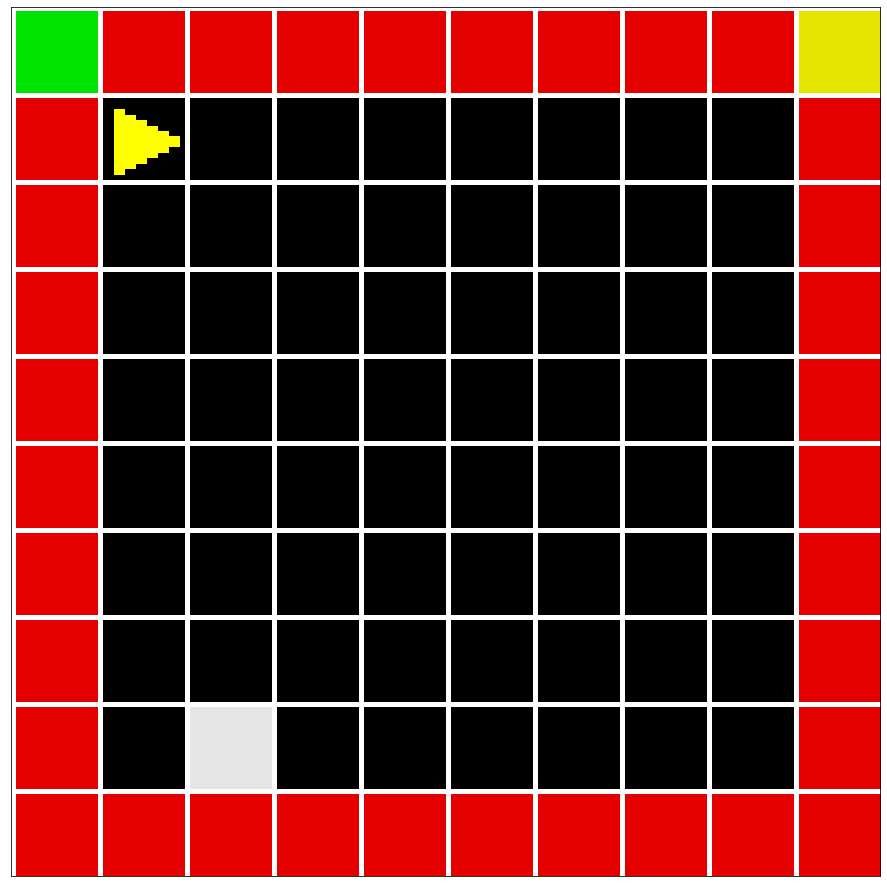

In [91]:
env.render('human')
print(env.agent)

In [85]:
env.step(1)

(array([0., 1., 5., 5., 1., 0., 0., 2., 0., 3.]), -1, False, {})

In [25]:
env.objects

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [442]:
#vision lines
env.agent[1] = 2
env.agent[0][1] = 8
env.agent[0][0] = 8
if env.agent[1] == 0:
    start = env.agent[0][1]
    end = env.world_size[1]
    left = env.agent[0][0] - env.view_width
    right = env.agent[0][0] + env.view_width
    left_idx = np.clip(left, 0, env.world_size[0])
    right_idx = np.clip(right, 0, env.world_size[0])
    left_right_idx = 0
    vis = env.visible[left_idx:right_idx+1, start:end] 
elif env.agent[1] == 1:
    start = 0
    end = env.agent[0][0]
    left = env.agent[0][1] - env.view_width
    right = env.agent[0][1] + env.view_width
    left_idx = np.clip(left, 0, env.world_size[1])
    right_idx = np.clip(right, 0, env.world_size[1])
    left_right_idx = 1
    vis = np.rot90(env.visible[start:end+1, left_idx:right_idx+1], k=3)
elif env.agent[1] == 2:
    start = 0
    end = env.agent[0][1]
    left = env.agent[0][0] + env.view_width
    right = env.agent[0][0] - env.view_width
    left_idx = np.clip(left, 0, env.world_size[0])
    right_idx = np.clip(right, 0, env.world_size[0])
    left_right_idx = 0
    vis = np.rot90(env.visible[right_idx:left_idx+1, start:end+1], k=2)
elif env.agent[1] == 3:
    start = env.agent[0][0]
    end = env.world_size[0]
    left = env.agent[0][1] + env.view_width
    right = env.agent[0][1] - env.view_width
    left_idx = np.clip(left, 0, env.world_size[1])
    right_idx = np.clip(right, 0, env.world_size[1])
    left_right_idx = 1
    vis = np.rot90(env.visible[start:end, right_idx:left_idx+1], k=1)

dists = np.argmax(vis > 0, axis=1)
colors = vis[np.arange(vis.shape[0]), dists]

if left < 0:
    dists = np.append([0]*-left, dists)
    colors = np.append([0]*-left, colors)
if left >= env.world_size[left_right_idx]:
    dists = np.append([0]*(env.world_size[left_right_idx] + 1 - left), dists)
    colors = np.append([0]*(env.world_size[left_right_idx] + 1 - left), colors)
if right < 0:
    dists = np.append(dists, [0]*-right)
    colors = np.append(colors, [0]*-right)
if right >= env.world_size[left_right_idx]:
    dists = np.append(dists, [0]*(env.world_size[left_right_idx] + 1 - right))
    colors = np.append(colors, [0]*(env.world_size[left_right_idx] + 1 - right))

# Test Evaluation functions

In [ ]:
import gym
import gym_nav
import torch
from evaluation import evaluate
from a2c_ppo_acktr.model import Policy
from a2c_ppo_acktr.envs import make_vec_envs
import numpy as np

In [6]:
folder = 'trained_models/ppo/'
eval_log_dir = '/tmp/gym/_eval'
device = torch.device("cpu")

env_kwargs = {'world_size': 14, 'num_obstacles': 0, 'give_dist': True, 'give_time': True}
env_name = 'Gridworld-v0'
num_processes = 1
seed = 1
capture_video = 0

actor_critic, obs_rms = torch.load(folder + 'grid_reshaping_1.pt')

In [4]:
eval_envs = make_vec_envs(env_name, seed + num_processes, 10,
                          None, eval_log_dir, device, True, capture_video=capture_video,
                          env_kwargs=env_kwargs)


In [3]:
all_obs, all_actions, all_rewards, all_hidden_states, eval_envs = evaluate(actor_critic, obs_rms, 'Gridworld-v0', 1, 1, 
         eval_log_dir, device, capture_video=1, env_kwargs=env_kwargs)

C:\Users\Andy\miniconda3\lib\site-packages\gym\wrappers\record_video.py:42: UserWarning: WARN: Overwriting existing videos at C:\Users\Andy\Desktop\Work\github\training-rl-algo\video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  f"Overwriting existing videos at {self.video_folder} folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)"


 Evaluation using 10 episodes: mean reward 0.80000



In [5]:
all_obs, all_actions, all_rewards, all_hidden_states, eval_envs = evaluate(actor_critic, obs_rms, 'Gridworld-v0', 1, 1, 
         eval_log_dir, device, capture_video=1, env_kwargs=env_kwargs)

 Evaluation using 10 episodes: mean reward 0.80000



In [7]:
all_obs, all_actions, all_rewards, all_hidden_states, eval_envs = evaluate(actor_critic, obs_rms, 'Gridworld-v0', 1, 1, 
         eval_log_dir, device, capture_video=1, env_kwargs=env_kwargs)

 Evaluation using 10 episodes: mean reward 1.00000



In [11]:
len(all_actions)

1092

In [13]:
all_actions

[tensor([[0]]),
 tensor([[0]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[0]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor([[1]]),
 tensor(

In [67]:
eval_envs.step(torch.tensor([[1]]))

(tensor([[ 8.6602e-01,  1.3416e+00,  1.3354e-03, -5.2223e-01, -9.3094e-01,
           6.7707e-01, -3.4756e-01, -4.0903e-02, -6.0107e-01, -7.6703e-01]]),
 tensor([[0.]]),
 array([False]),
 [{}])

[None]

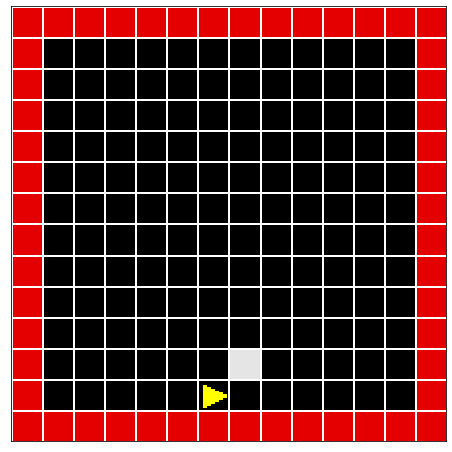

In [68]:
eval_envs.env_method('render')

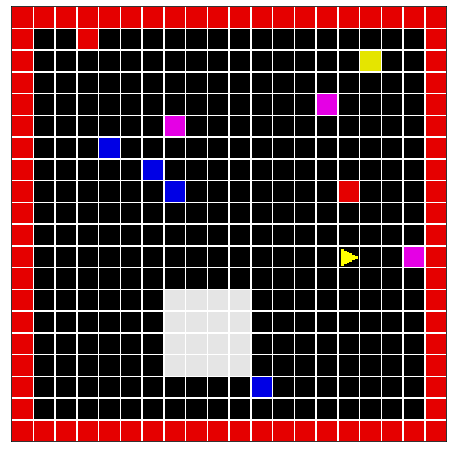

In [46]:
env = gym.make('Gridworld-v0', goal_size=4)

env.seed(2)

env.reset()

env.render()

In [1]:
import gym
import gym_nav
import torch
from evaluation import evaluate
from a2c_ppo_acktr.model import Policy
from a2c_ppo_acktr.envs import make_vec_envs
import numpy as np

In [22]:
env = gym.make('Gridworld-v0', give_dist=True, give_direction=True, give_time=True,
               world_size=6, num_obstacles=0, reward_shaping=3)
env.reset()

(array([1., 1., 1., 1., 0., 4., 4., 4., 0., 0., 1., 0.]),
 array([1., 1., 1., 1., 0.]))

In [10]:
env = gym.make('Gridworld-v0', num_obstacles=0, wall_colors=4)

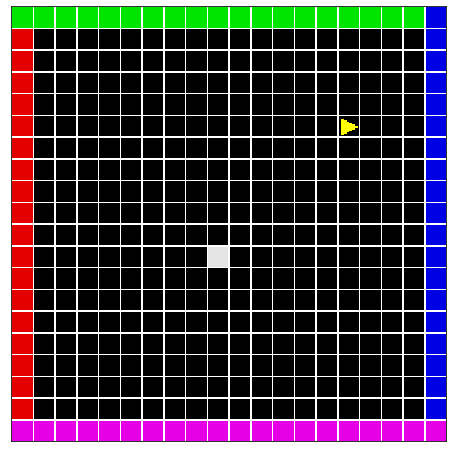

In [11]:
env.render()